In [29]:
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from IPython.display import display,Image
xml_annotation_path = 'xml_annotation/'
%matplotlib inline


action_list = [" Basketball ", " CliffDiving " , " Fencing "," HorseRiding "," PoleVault "," SkateBoarding "," SoccerJuggling "\
               ," TrampolineJumping "," BasketballDunk "," CricketBowling "," FloorGymnastics "," IceDancing "," RopeClimbing ",\
               " Skiing "," Surfing "," VolleyballSpiking "," Biking "," Diving "," GolfSwing "," LongJump "," SalsaSpin "," Skijet ",\
               " TennisSwing "," WalkingWithDog "]

action_dict = dict(zip(action_list, range(len(action_list))))

print action_dict

{' SkateBoarding ': 5, ' Biking ': 16, ' WalkingWithDog ': 23, ' Skijet ': 21, ' PoleVault ': 4, ' SoccerJuggling ': 6, ' Skiing ': 13, ' GolfSwing ': 18, ' SalsaSpin ': 20, ' VolleyballSpiking ': 15, ' RopeClimbing ': 12, ' Surfing ': 14, ' IceDancing ': 11, ' HorseRiding ': 3, ' Basketball ': 0, ' CliffDiving ': 1, ' TennisSwing ': 22, ' Fencing ': 2, ' FloorGymnastics ': 10, ' TrampolineJumping ': 7, ' BasketballDunk ': 8, ' Diving ': 17, ' LongJump ': 19, ' CricketBowling ': 9}


In [2]:
filelist=[]

for root,subdir,dirs in os.walk(xml_annotation_path):
    for file_name in dirs:
        filelist.append(os.path.join(root,file_name))
        



In [3]:
def parse_rec(filename):
    """ Parse a VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        obj_struct['action'] = int(obj.find('action').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects


xml_annotation/TennisSwing/v_TennisSwing_g18_c03/70.xml
images/TennisSwing/v_TennisSwing_g18_c03/070.jpg
 TennisSwing 
22
[130, 54, 188, 169]


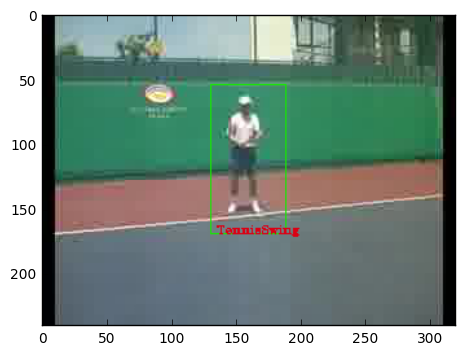

In [76]:
i = random.randint(0,603817)
file_name = filelist[i]
print file_name

colors = plt.cm.brg(np.linspace(0, 1, 24)).tolist()
color_list = []
for color in colors:
    #print color[0],color[1], color[2]
    color_list.append([color[0]*255,color[1]*255, color[2]*255]) 


img_path = "images/"+file_name.split('/')[1]+"/"+file_name.split('/')[2]+"/%03d"%(int(file_name.split('/')[3].split('.')[0]))+".jpg"
print img_path

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tree = ET.parse(file_name)
root = tree.getroot()
a = parse_rec(file_name)



for ann in a:
    idx = action_dict[str(ann['name'])]
    print ann['name']
    print idx
    print ann['bbox']
    cv2.rectangle(img,(ann['bbox'][0],ann['bbox'][1]),(ann['bbox'][2],ann['bbox'][3]),color_list[idx],1)
    cv2.putText(img,ann['name'],(ann['bbox'][0],ann['bbox'][3]), cv2.FONT_HERSHEY_TRIPLEX,0.3,(220,0,20),1)
plt.imshow(img)

#display(Image(filename=img_path))



#for child in root.iter():
#    print child.tag,child.attrib

In [74]:
colors = plt.cm.brg(np.linspace(0, 1, 24)).tolist()
color_list = []

for color in colors:
    #print color[0],color[1], color[2]
    color_list.append([color[0]*255,color[1]*255, color[2]*255])

#print color_list

In [49]:
print action_dict

{' SkateBoarding ': 5, ' Biking ': 16, ' WalkingWithDog ': 23, ' Skijet ': 21, ' PoleVault ': 4, ' SoccerJuggling ': 6, ' Skiing ': 13, ' GolfSwing ': 18, ' SalsaSpin ': 20, ' VolleyballSpiking ': 15, ' RopeClimbing ': 12, ' Surfing ': 14, ' IceDancing ': 11, ' HorseRiding ': 3, ' Basketball ': 0, ' CliffDiving ': 1, ' TennisSwing ': 22, ' Fencing ': 2, ' FloorGymnastics ': 10, ' TrampolineJumping ': 7, ' BasketballDunk ': 8, ' Diving ': 17, ' LongJump ': 19, ' CricketBowling ': 9}
